In [82]:
import pandas as pd
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter
import datetime as dt

In [13]:
!pip install -U spacy

     |████████████████████████████████| 6.9 MB 3.5 MB/s eta 0:00:01
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
     |████████████████████████████████| 42 kB 2.4 MB/s  eta 0:00:01
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
     |████████████████████████████████| 493 kB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 880 kB 70.9 MB/s eta 0:00:01
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
     |████████████████████████████████| 395 kB 35.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 14.7 MB/s eta 0:00:01
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
     |████████████████████████████████| 133 kB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 77.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 7.5 MB/s  eta 0:00:01
  Attempting uninsta

In [16]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 3.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
import spacy

In [87]:
curr_news_df = pd.read_csv('../si485/all_sources_resDf.csv')

In [88]:
curr_news_df = curr_news_df.dropna(subset=['text'])
curr_news_df = curr_news_df.drop_duplicates(subset=['text'])

In [89]:
# adding datetime cols
curr_news_df['datetime'] = pd.to_datetime(curr_news_df['publish_date'])
curr_news_df['year'] = curr_news_df['datetime'].dt.year
curr_news_df['month'] = curr_news_df['datetime'].dt.month
curr_news_df['day'] = curr_news_df['datetime'].dt.day

In [90]:
curr_news_df.drop(columns=['Unnamed: 0'], inplace=True)

In [91]:
curr_news_df.head()

,source_name,source_id,publish_date,title,text,datetime,year,month,day
0,CBC News,cbc-news,2024-01-25T17:08:14Z,Are heat pumps a climate solution in Canada's ...,Our planet is changing. So is our journalism. ...,2024-01-25 17:08:14+00:00,2024,1,25
1,CBC News,cbc-news,2024-02-02T17:13:17Z,"Greta Thunberg, 4 others acquitted on London c...",A judge on Friday acquitted climate activist G...,2024-02-02 17:13:17+00:00,2024,2,2
2,CBC News,cbc-news,2024-02-01T18:33:06Z,How effective a climate solution is removing C...,Our planet is changing. So is our journalism. ...,2024-02-01 18:33:06+00:00,2024,2,1
3,CBC News,cbc-news,2024-01-16T22:39:54Z,YouTube earns millions a year channels that pr...,YouTube is making millions of dollars a year f...,2024-01-16 22:39:54+00:00,2024,1,16
4,CBC News,cbc-news,2024-01-17T09:00:00Z,Climate change threatens northern Ontario's wi...,Tyler Tyance is all too familiar with the long...,2024-01-17 09:00:00+00:00,2024,1,17


In [92]:
len(curr_news_df)

127

In [93]:
# will need to align this cleaning with the cleaning and vectorizing that we do
nlp = spacy.load('en_core_web_sm') 

In [94]:
curr_news_df['text'][1]

'A judge on Friday acquitted climate activist Greta Thunberg of a charge that she had refused to follow a police order to leave a protest that blocked the entrance to a major oil and gas industry conf… [+3535 chars]'

In [95]:
# adding col with tokens
def tokenize_text(text):
     if text is np.NaN:
        return []
     else:
        text = text.lower().strip().replace('\n', '').replace('\r', '')
        text = re.sub(r'[^\w\s]+', '', text)
        doc = nlp(text)
        return [token.text for token in doc if not token.is_stop]

In [96]:
curr_news_df['tokenized_text'] = curr_news_df['text'].apply(tokenize_text)

In [97]:
# adding col with most common word

curr_news_df['most_common_word'] = curr_news_df['tokenized_text'].apply(lambda x: Counter(x).most_common(1)[0][0])

In [98]:
# adding col with sentiment analysis 

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(token_list):
    sentiment = sent_analyzer.polarity_scores(' '.join(token_list))
    return sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rachelpawlik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
curr_news_df['text_sentiment'] = curr_news_df['tokenized_text'].apply(sentiment_scores)

In [100]:
# adding col with most common pos

def get_mostcommon_pos(tokenized_text):
    if len(tokenized_text) == 0:
        return []
    else:
        doc = nlp(' '.join(tokenized_text))
        pos = [token.pos_ for token in doc]
        return Counter(pos).most_common(1)[0][0]

In [101]:
curr_news_df['most_common_pos'] = curr_news_df['tokenized_text'].apply(get_mostcommon_pos)

In [102]:
curr_news_df.head()

,source_name,source_id,publish_date,title,text,datetime,year,month,day,tokenized_text,most_common_word,text_sentiment,most_common_pos
0,CBC News,cbc-news,2024-01-25T17:08:14Z,Are heat pumps a climate solution in Canada's ...,Our planet is changing. So is our journalism. ...,2024-01-25 17:08:14+00:00,2024,1,25,"[planet, changing, journalism, weekly, newslet...",planet,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",NOUN
1,CBC News,cbc-news,2024-02-02T17:13:17Z,"Greta Thunberg, 4 others acquitted on London c...",A judge on Friday acquitted climate activist G...,2024-02-02 17:13:17+00:00,2024,2,2,"[judge, friday, acquitted, climate, activist, ...",judge,"{'neg': 0.273, 'neu': 0.655, 'pos': 0.073, 'co...",NOUN
2,CBC News,cbc-news,2024-02-01T18:33:06Z,How effective a climate solution is removing C...,Our planet is changing. So is our journalism. ...,2024-02-01 18:33:06+00:00,2024,2,1,"[planet, changing, journalism, weekly, newslet...",planet,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",NOUN
3,CBC News,cbc-news,2024-01-16T22:39:54Z,YouTube earns millions a year channels that pr...,YouTube is making millions of dollars a year f...,2024-01-16 22:39:54+00:00,2024,1,16,"[youtube, making, millions, dollars, year, adv...",youtube,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NOUN
4,CBC News,cbc-news,2024-01-17T09:00:00Z,Climate change threatens northern Ontario's wi...,Tyler Tyance is all too familiar with the long...,2024-01-17 09:00:00+00:00,2024,1,17,"[tyler, tyance, familiar, long, days, cold, ni...",tyler,"{'neg': 0.136, 'neu': 0.809, 'pos': 0.055, 'co...",NOUN


# Exploratory Analysis

- Graph of Diff Features over Time

<AxesSubplot:xlabel='most_common_pos', ylabel='count'>

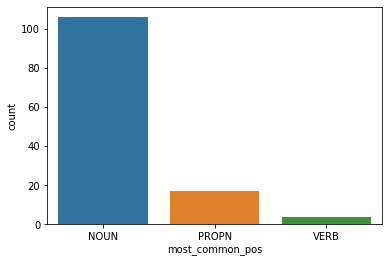

In [104]:
sns.countplot(x='most_common_pos', data=curr_news_df)

<AxesSubplot:xlabel='most_common_word', ylabel='count'>

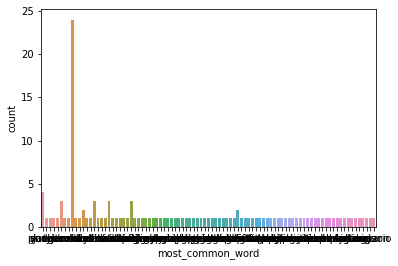

In [105]:
sns.countplot(curr_news_df['most_common_word'])